# Company Master - Maharashtra

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# 1. Histogram of Authorized Cap

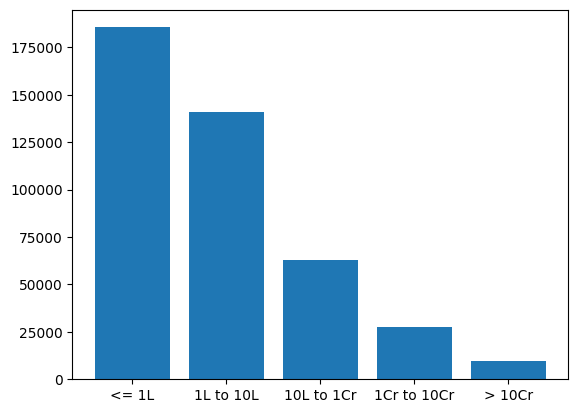

In [5]:
def load_data(filename='Maharashtra.csv'):
    file_obj = open(filename, encoding='unicode_escape')
    reader = csv.reader(file_obj)
    header = next(file_obj).split(',')
    return file_obj, reader, header

def initialize_bins():
    lower_limits = [0, 1e5+1, 1e6+1, 1e7+1, 1e8+1]
    upper_limits = [1e5, 1e6, 1e7, 1e8, 1e18]
    return lower_limits, upper_limits

def initialize_labels():
    categories = ['<= 1L', '1L to 10L', '10L to 1Cr', '1Cr to 10Cr', '> 10Cr']
    return categories

def initialize_columns(header):
    columns_mapping = {}
    for i, col in enumerate(header):
        columns_mapping[col] = i
    return columns_mapping

def process_data(file_obj, reader, columns):
    count_per_category = [0] * 5

    for row in reader:
        authorized_cap = float(row[columns['AUTHORIZED_CAP']])
        for i in range(5):
            if lower_limits[i] <= authorized_cap <= upper_limits[i]:
                count_per_category[i] += 1

    file_obj.close()
    return count_per_category

def plot_data(categories, counts):
    plt.bar(categories, counts)
    plt.show()

if __name__ == "__main__":
    file_obj, reader_obj, heading = load_data()
    lower_limits, upper_limits = initialize_bins()
    categories = initialize_labels()
    columns_mapping = initialize_columns(heading)
    count_per_category = process_data(file_obj, reader_obj, columns_mapping)
    plot_data(categories, count_per_category)


# 2. Bar Plot of company registration by year

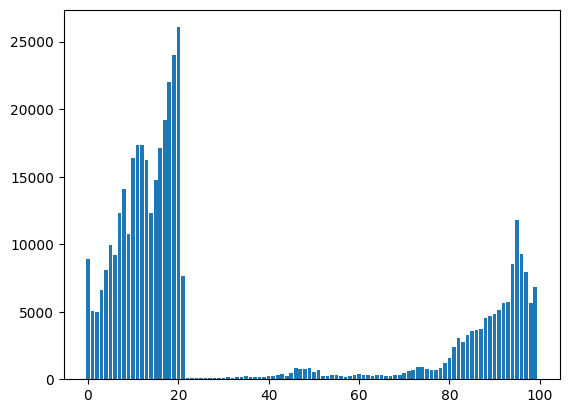

In [6]:
import csv
import matplotlib.pyplot as plt

def process_csv_data(filename='Maharashtra.csv'):
    with open(filename, encoding='unicode_escape') as file:
        header = next(file)
        header = header.rstrip('\n')
        column_names = header.split(",")
        columns_mapping = {}

        for i, column_name in enumerate(column_names):
            columns_mapping[column_name] = i

        reader = csv.reader(file)
        count_per_year = [0] * 100

        for row in reader:
            registration_date = row[columns_mapping['DATE_OF_REGISTRATION']]
            last_two_digits = registration_date[-2:]

            if last_two_digits == "NA":
                continue

            count_per_year[int(last_two_digits)] += 1

    return count_per_year

def plot_registration_data(count_data):
    plt.bar(list(range(0, 100)), count_data)
    plt.show()

if __name__ == "__main__":
    registration_count = process_csv_data()
    plot_registration_data(registration_count)


# 3. Company registration in the year 2015 by the district.

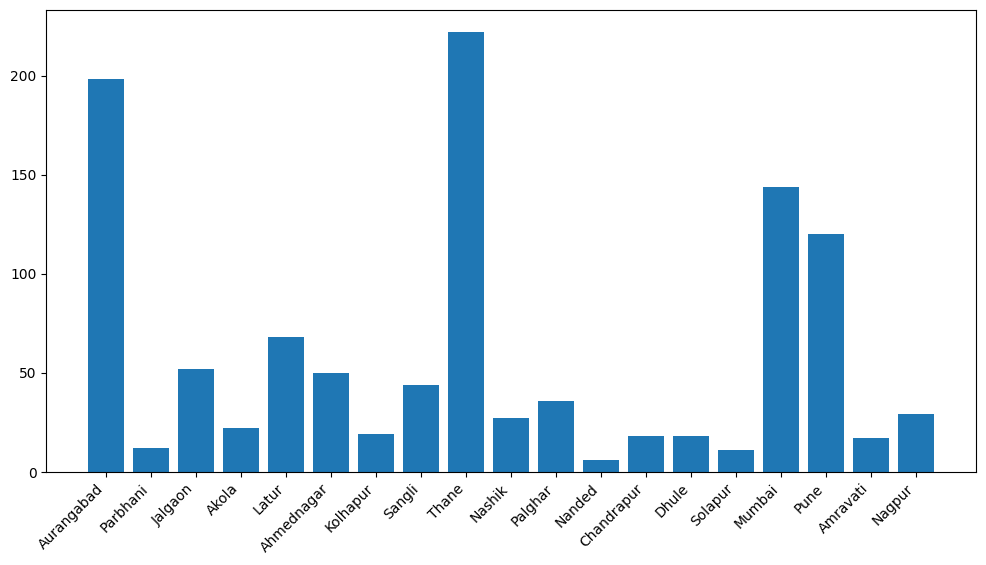

In [7]:
def process_pincode_data():
    pincode_obj = {}
    
    with open('Maharashtra.csv', encoding='unicode_escape') as file:
        heading = next(file)
        heading = heading.rstrip('\n')
        column_names = heading.split(",")
        columns_mapping = {}

        for i, column_name in enumerate(column_names):
            columns_mapping[column_name] = i

        reader = csv.reader(file)

        for row in reader:
            address = row[columns_mapping['Registered_Office_Address']]
            address_tokens = address.split(" ")
            pincode = address_tokens[-1]

            if pincode == '' or row[columns_mapping['DATE_OF_REGISTRATION']][-2:] != '15':
                continue

            pincode_obj[pincode] = pincode_obj.get(pincode, 0) + 1

    return pincode_obj

def read_pincode_district_mapping():
    district_mapping = {}

    with open('pincode.csv', encoding='unicode_escape') as file:
        column_names = next(file).rstrip('\n').split(",")
        columns_mapping = {}

        for i, column_name in enumerate(column_names):
            columns_mapping[column_name] = i

        reader = csv.reader(file)
        
        for row in reader:
            district_mapping[row[columns_mapping['Pin Code']]] = row[columns_mapping['District']]

    return district_mapping

def plot_pincode_data(pincode_data, district_mapping):
    districts = []
    counts = []

    for pincode, count in pincode_data.items():
        if pincode in district_mapping:
            districts.append(district_mapping[pincode])
            counts.append(count)

    plt.figure(figsize=(12,6))
    plt.bar(districts, counts)
    plt.xticks(rotation=45, ha='right')
    plt.show()

if __name__ == "__main__":
    pincode_data = process_pincode_data()
    district_mapping = read_pincode_district_mapping()
    plot_pincode_data(pincode_data, district_mapping)


# 4. Grouped Bar Plot.

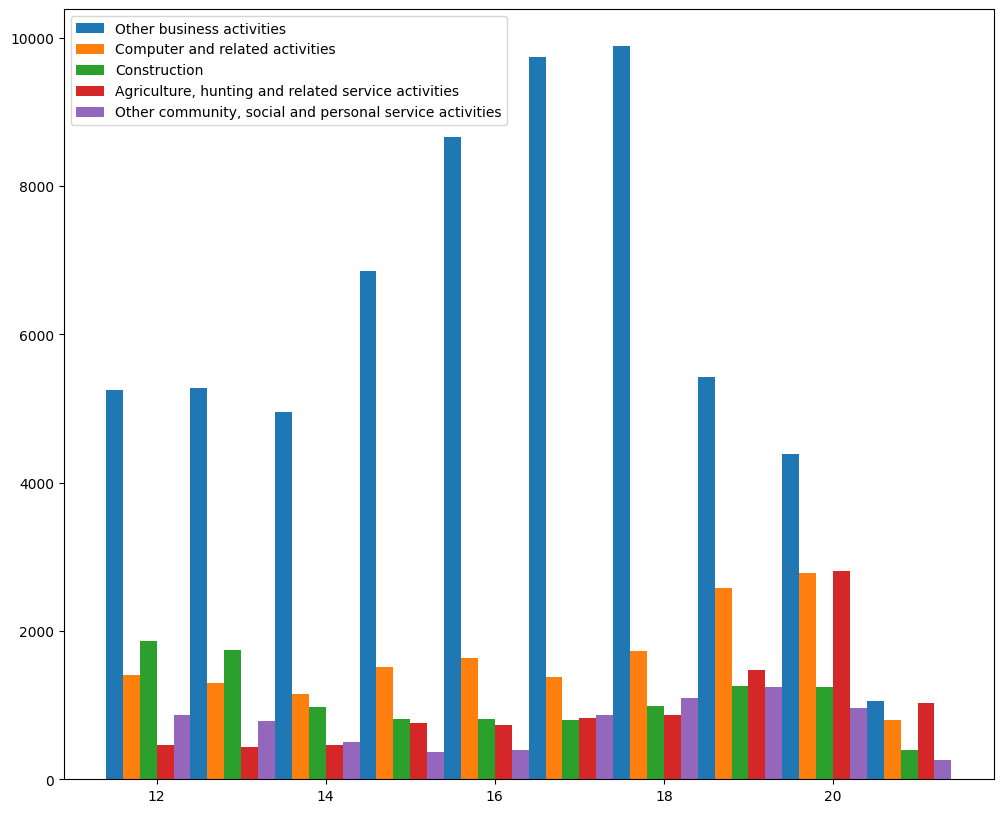

In [8]:
def process_registration_data():
    data_by_month = {}
    business_labels = {}

    with open('Maharashtra.csv', encoding='unicode_escape') as file:
        heading = next(file)
        heading = heading.rstrip('\n')
        column_names = heading.split(",")
        columns_mapping = {}

        for i, column_name in enumerate(column_names):
            columns_mapping[column_name] = i

        reader = csv.reader(file)

        for row in reader:
            registration_month = row[columns_mapping['DATE_OF_REGISTRATION']][-2:]

            if registration_month == "NA":
                continue

            registration_month = int(registration_month)

            if registration_month <= 11 or registration_month > 21:
                continue

            if registration_month not in data_by_month:
                data_by_month[registration_month] = {}

            business_activity = row[columns_mapping['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']]
            business_labels[business_activity] = business_labels.get(business_activity, 0) + 1
            data_by_month[registration_month][business_activity] = data_by_month[registration_month].get(business_activity, 0) + 1

    return data_by_month, business_labels

def plot_data_by_month(data_by_month, top_business_labels):
    arr2d = []

    for label in top_business_labels:
        tmp = [data_by_month[month].get(label, 0) for month in data_by_month]
        arr2d.append(tmp)

    bar_width = 0.2
    positions = np.array(list(data_by_month.keys()))

    plt.figure(figsize=(12, 10))

    for i, label in enumerate(top_business_labels):
        plt.bar(positions + bar_width * (i - len(top_business_labels) / 2), arr2d[i], bar_width)

    plt.legend(top_business_labels)
    plt.show()

if __name__ == "__main__":
    data_by_month, business_labels = process_registration_data()
    top_business_labels = dict(sorted(business_labels.items(), key=lambda x: x[1], reverse=True)).keys()
    top_business_labels = list(top_business_labels)[:5]
    
    plot_data_by_month(data_by_month, top_business_labels)
